# Data Project for Ant Financial 2019 Intern Interview
# 蚂蚁金服2019暑期实习笔试建模项目

## *Frank Xu*
## *胥华泽*

***Tel: (+86)138-1765-8359/(+1)919-308-3187***

***Email: frankxu0124@gmail.com***

#### (1) 描述一个你曾经完成或参与的数据分析的项目

##### A.数据集的大小，包含多少变量/字段？你曾经用过的最大数据是多少？数据的采样是如何进行的？如果是你进行采样，用了什么语言/算法/软件？

目前正在做一个来自Kaggle竞赛的项目：***Microsoft Malware Prediction (https://www.kaggle.com/c/microsoft-malware-prediction), 微软恶意软件预测项目***。

其目标是根据每台计算机的不同特征和属性预测Windows计算机被各种恶意软件系列感染的可能性。其数据由主要由Windows Defender收集的威胁报告生成。

数据集的大小：Training dataset 为8921483行，共有83列（包括需要预测的变量以及区别每一行数据的机器编号，预测变量实际是81列）。Testing dataset 共7853253行，共82列（包括区别每一行数据的机器编号）。

全部读入内存后共占用15.3GB。81列预测变量中，binary占20列，numerical占8列，其余的都属于multiple class。这也同时是我所接触过的最大数据。

数据的采样主要通过微软Windows Defender收集的威胁报告生成，同时过滤了部分涉及商业和个人隐私的部分，其具体信息并未在竞赛中提及。

##### B.在数据处理中，你需要考虑哪些因素，是否需要做数据清洗？是否数据采样有取样偏差（sampling Bias）？

在本项目（Microsoft Malware Prediction）的数据处理中，需要做数据清洗，需要考虑的因素包括：

1. 数据类型的处理：涉及的数据类型较多，numerical与binary的大部分可以直接代入模型，而categorical（>2）则需要做one-hot-encode，生成dummy variable后才能使用。如果有日期的话则更困难（本项目没有时间，或是因商业原因已经经过预处理变为numerical），要视具体情况而定，有时可以将日期作为categorical处理，有时转为numerical处理。
2. 内存优化：鉴于提供的kernal内存较小（近17.3G)，许多操作无法完成（或耗时过长），比如从一开始读取数据就需要选择low_memory模式并预设好每个column的type才能读取；没有办法使用pandas的dataframe对数据进行整理；以及有些one-hot-encoder的空间占用较大无法使用等等，这些都给数据预处理带来了很大难度。这点在许多小数据分析过程中并不重要，但一旦数据容量较大，则会显著影响时间。
3. 数据存在偏差：对于部分categorical数据而言，出现了某些属性集中出现在training data或是testing data中的情况。为了保证模型的性能以及提升速度，去除了90%以上集中在某一个data set中的category。

890万行数据中，label=0与label=1的数据基本各占一半。取样偏差鉴于我没有参与数据采样的过程，无法详细回答，但是鉴于该比赛以及微软官方提供数据集的权威性，我认为其偏差较小，或是被控制在微软想要引导我们得出某些结果的范围内。

##### C.你采用了什么样的分析/建模方法？是否这些方法符合业界标准？是否对你的数据最优？

我采用了Gradient Boosting以及Random Search Cross Validation的方法，并通过随机抽样获取较好的模型Hyperparameter。

该方法对于Kaggle竞赛而言较为常见，同时由于gradient boosting不属于黑箱模型，应该符合大部分业界标准。对于如此庞大的数据而言，属于兼顾速度和准确度的选择（对于竞赛来说是在一定时间内达到最高的准确度），因此对于数据是较为优秀的选择。

##### D.如何实现以上的方法？

主要利用了lightgbm包，以及sklearn包中的RandomSearchCV函数来实现以上算法，具体过程大致为：1.从数据中分出小部分数据用于early stopping判断标准（以有效减少训练时间）；2.设定模型参数以及hyperparameter的分布范围；3.初始化模型与randomsearchcv；4.在选定的循环次数内，randomsearchcv函数随机从hyperparameter的分布中选取参数并进行学习，并在最后选出crossvalidation分数（ROC）最高的hyperparameter；5.使用该参数重新对训练数据进行学习，并产生预测结果。由于在本项目中使用了类似的方法，不过由于数据量较小，略去了early stopping步骤。具体代码可以参照（3）中Part V。

#### (2) 你常用哪些方法清洗/分析数据?

比较常用的数据清洗方法：
1. pd.dataframe.describe()：用于查看整个数据中每一列数据的基本统计参数，类似于R中summary()函数功能。可以知道数据行数，查看是否存在NaN，结合column的意义查看是否有异常值存在。
2. pd.dataframe.isnull().any(): 快速查看每列数据是否存在missing values。
3. 检查各column名是否正常并适合使用：是否存在名字前后含有空格导致无法index，是否名字过长无法表达真实含义。具体代码因功能而异。
4. 检查数据类型，是否存在日期数据，是否存在应该作为categorical的numerical数据等等。代码因功能而异。
5. 检查数据是否偏差，各category 以及label是否较为均匀地分布在数据集中。代码因功能而异。
6. 将数据转为array进行建模分析。代码因功能而异。

比较常用的数据分析方法：
1. 用histogram及boxplot检查数据分布类型。
2. 对于逻辑上可能存在关联的numerical数据使用scatter plot查看是否存在collinearity。
3. （对于linear模型）检查residual plots以确定是否存在需要non-linear的数据。
4. 如果数据严重不平衡，可以采用oversampling或undersampling，亦或是调整模型权重的方法进行调整。

#### (3) 数据分析与建模测试

## ***Part I*** 

### ***Data Preprocessing***

In [1]:
%config InlineBackend.figure_format = 'retina'
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# Load data
train = pd.read_csv('ads_train.csv')
test = pd.read_csv('ads_test.csv')

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train.describe()

,Unnamed: 0,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,38209.000000,38209.000000,1620.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000,38209.000000
mean,19105.000000,0.042398,1.239506,1.868199,0.197411,5.862179,-0.174376,-10.136685,64.657384,64.657384,0.005967,0.277526,86.594624,723.834515,0.004502
std,11030.132554,0.201499,0.840259,2.996675,3.855662,17.726455,4.784059,31.796845,53.453475,53.453475,0.077018,0.447784,61.941089,1286.380572,0.066943
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,9553.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,19105.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,28657.000000,0.000000,1.000000,2.000000,0.000000,0.125000,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,803.000000,0.000000
max,38209.000000,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


In [3]:
test.describe()

,Unnamed: 0,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins
count,16375.000000,16375.000000,707.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000
mean,8188.000000,0.043176,1.243281,1.816794,0.239401,5.740282,-0.253258,-10.383691,64.897221,64.897221,0.007267,0.277252,86.510351,713.244641
std,4727.199664,0.203258,0.629937,2.738963,4.072613,17.286116,5.463852,32.072581,53.531969,53.531969,0.084940,0.447656,62.038476,1250.523815
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-171.514200,-185.012100,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,4094.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,29.000000,126.000000
50%,8188.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,75.000000,320.000000
75%,12281.500000,0.000000,1.000000,2.000000,0.000000,0.083333,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,799.500000
max,16375.000000,1.000000,6.000000,75.000000,150.625000,180.875000,71.929500,88.432370,187.000000,187.000000,1.000000,1.000000,199.000000,31649.000000


#### ***Some important points:***

***1. Among all the 13 predictors, there are 3 binary indicators (isbuyer, multiple_buy, multiple_visit), the rest are all numeric continuous values.***

***2. Column 'buy_freq' has many missing values. Given the fact that there is no 0 in the column and knowing the meaning is 'How many times purchased in the past', I am assuming those missing values should mean they have not purchased anything before. Therefore they should be replaced by 0.***

***3. Data is seriously unbalanced. However, I believe we should not re-sample data before knowing the full picture after the dataset. In training data, the label we are going to predict is biased: only 172 of 38209 obs of data is labeled 1, while the rest 99.5% of training data is labeled 0.***

***4. Given the distribution of undefined fields (expected_time_buy, expected_time_visit, multiple_buy, multiple_visit) below, the meanings proposed are:***

***expected_time_buy***: the expected time before making a purchase after register according to previous data (negative means the user is past the expected time);

***expected_time_visit***: the expected time before visiting website after register according to previous data (negative means the user is past the expected time);

***multiple_buy***: whether the user purchase multiple items at one time;

***multiple_visit***: whether the user visit multiple pages from the website at one time;

### Let's see the data distribution:

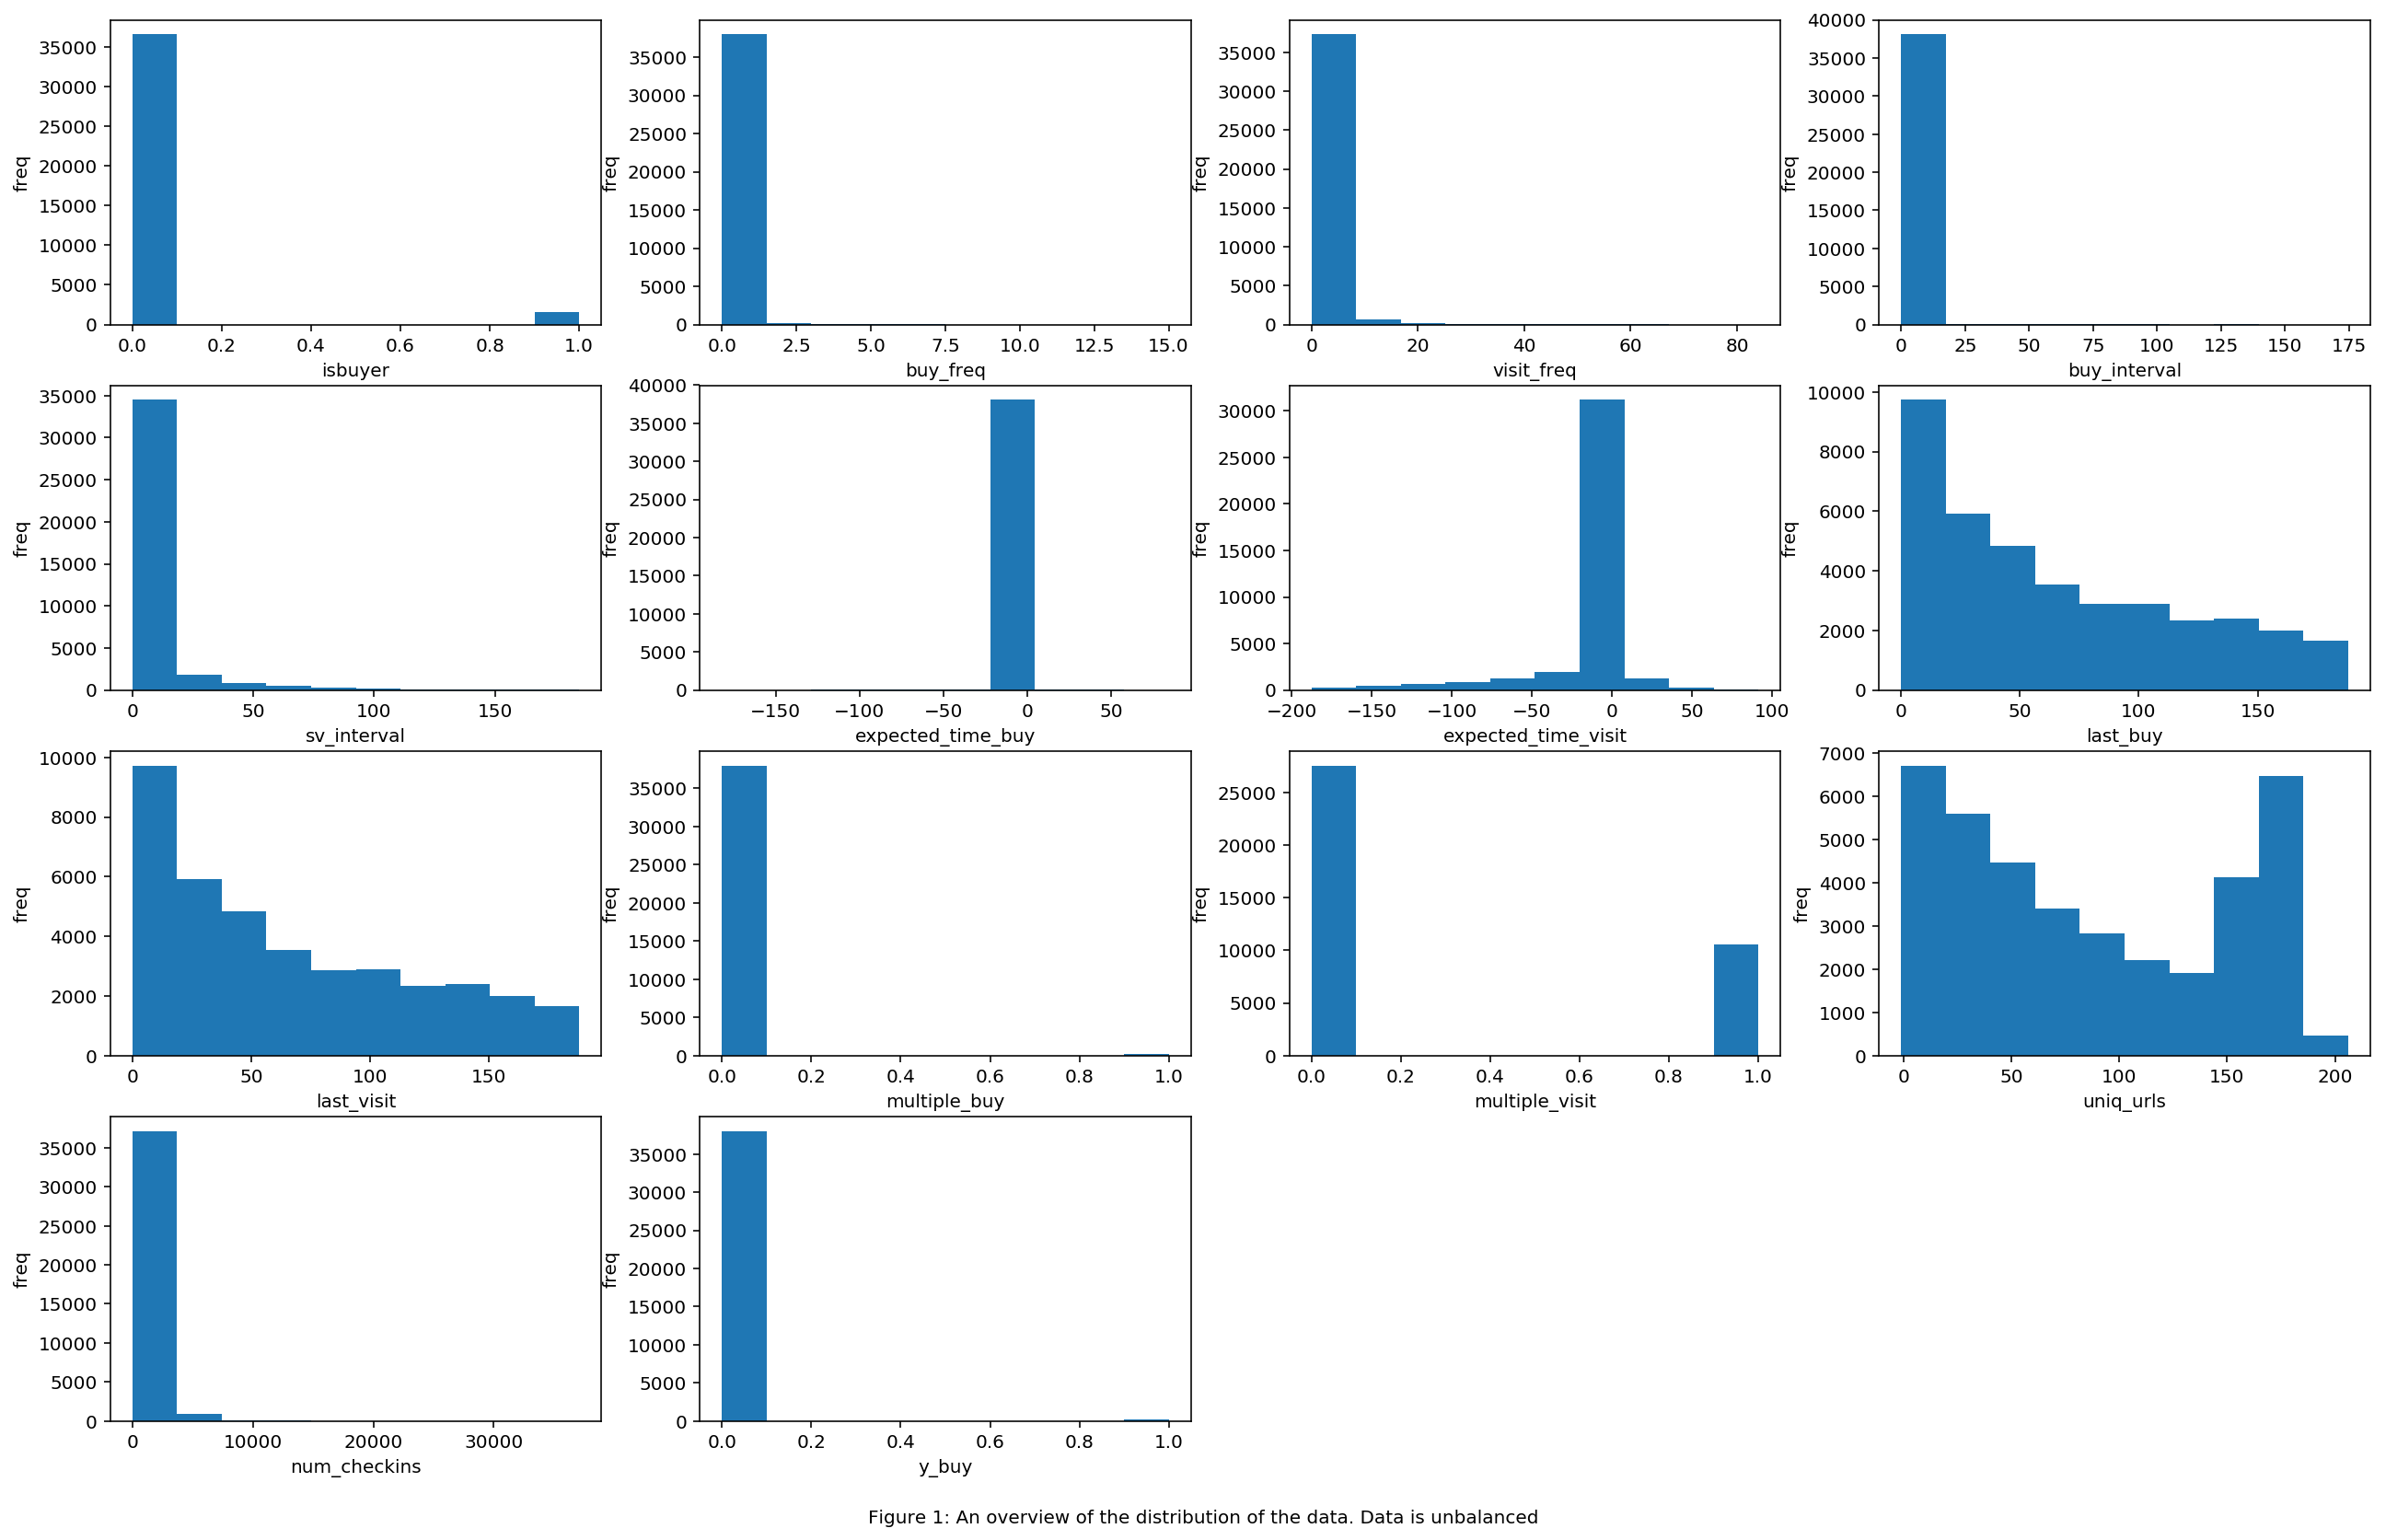

In [4]:
# Replacing NaN with 0.
train.buy_freq.fillna(0, inplace=True)
test.buy_freq.fillna(0, inplace=True)

# An overview of the distribution of the data
train_label = train.columns.values[1:15]
fig = plt.figure(figsize=(22, 14))
for idx, col in enumerate(train_label):
    plt.subplot(4, 4, idx+1)
    plt.hist(train[col])
    plt.ylabel('freq');plt.xlabel(train_label[idx])
fig.text(.5, .07, 'Figure 1: An overview of the distribution of the data. Data is unbalanced', ha='center')
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize and train a tree classifier to see the influence of each column
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5).fit(train.iloc[:,1:14].values, train.y_buy.values)

# Creating a df of influences
influ_dict = dict(zip(train.iloc[:,1:14].columns.values, tree.feature_importances_))
df_influ = pd.DataFrame(pd.Series(influ_dict), columns = ['influence'])

# Creating a df of auc
auc_dict = {}
for col in train.iloc[:,1:14].columns:
    fpr, tpr, _ = roc_curve(train.y_buy.values, train[col])
    auc_dict[col] = auc(fpr, tpr)
df_auc = pd.DataFrame(pd.Series(auc_dict), columns = ['auc'])

# Merge two df on feature name
imp_df = df_auc.merge(df_influ, left_index = True, right_index = True)

# Rank the df (the smaller the number, the higher the rank)
imp_df.rank(axis = 0, ascending = False)


,auc,influence
isbuyer,5.0,11.0
buy_freq,4.0,4.0
visit_freq,1.0,2.0
buy_interval,7.0,5.0
sv_interval,3.0,7.0
expected_time_buy,9.0,11.0
expected_time_visit,6.0,6.0
last_buy,12.5,11.0
last_visit,12.5,1.0
multiple_buy,8.0,11.0


***This is a table of the rank of auc and influence of each features in the dataset (the smaller the number, the higher the rank). We can see that some features have high auc rank but low influence rank (sv_interval, expected_time_visit, multiple_visit, etc.). This is because those features have too little appearance in the dataset, and once they appear they have great influence on target variable.***

#### ***Overall speaking, the feature with most influence on whether users will buy is visit_freq.***

In [6]:
from sklearn.model_selection import StratifiedKFold

# Generating training data
X = train.iloc[:,1:14].values
y = train.y_buy.values
X_test = test.iloc[:,1:14].values

# Creating a dataframe to store all the cross validation result
CV = pd.DataFrame({'index': np.arange(0,len(X))})

# Initializing StratifiedKFold for CV
skf = StratifiedKFold(n_splits = 10, random_state = 124)

## ***Part II*** 

### ***Model: Logistic Regression Classifier***

***(a) Why to use logistic regression?***

##### Because as the most basic and one of the simpliest binary classifier, it is always worth try to see the performance with it to get to know how easy it is to fit the data. The accuracy score from logistic regression can also be a reference for other methods. Moreover, it is not a black box model and can be applied to unbalanced data.

***(b) Let's first try the regression model on imblanced data!***

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     38037
     Class 1       0.67      0.01      0.02       172

   micro avg       1.00      1.00      1.00     38209
   macro avg       0.83      0.51      0.51     38209
weighted avg       0.99      1.00      0.99     38209



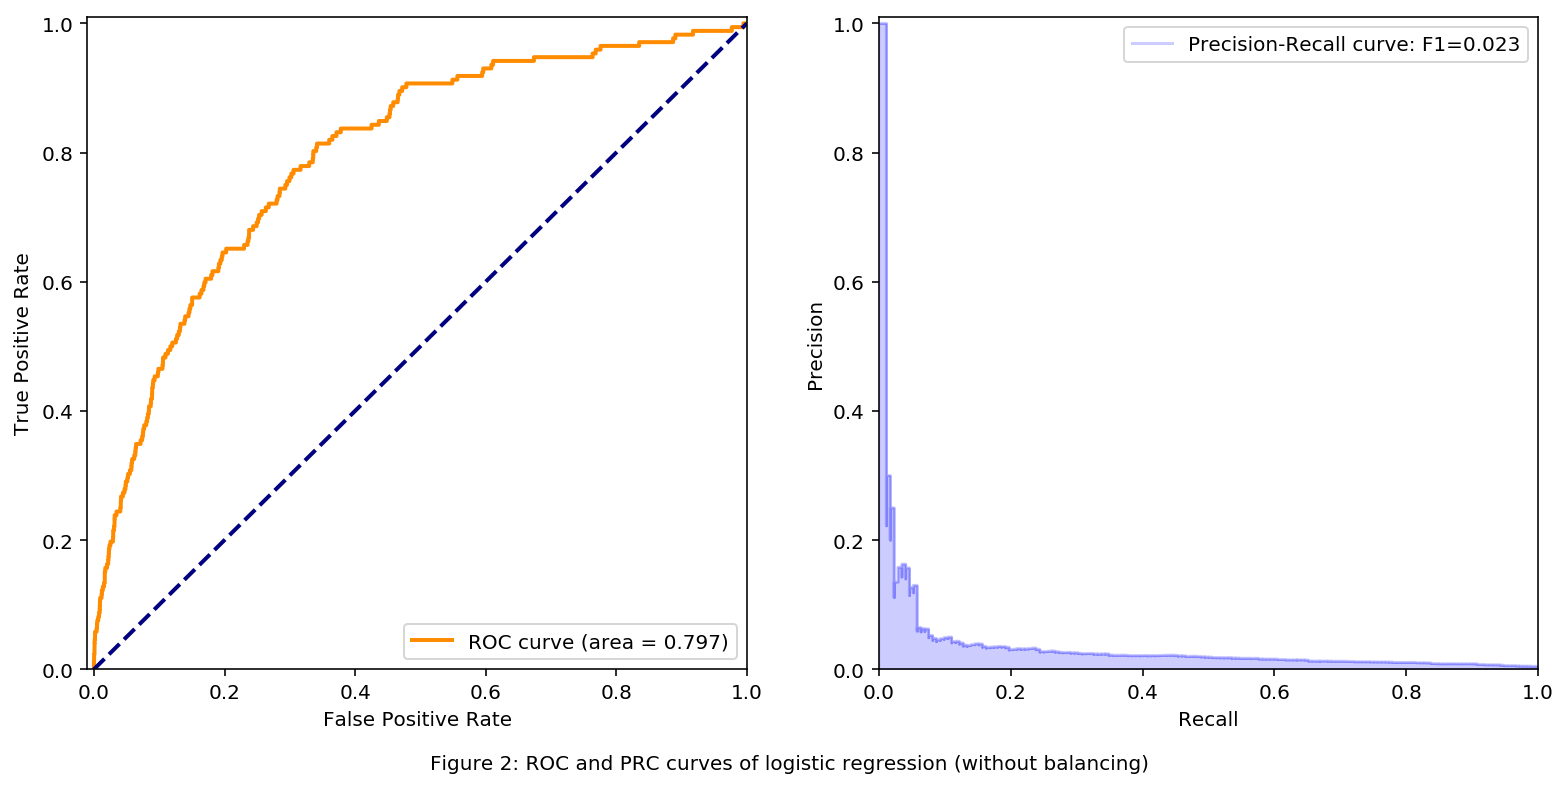

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# A utility function for plotting ROC curves
def plot_curves(label, preds, C = True, lab = ''):
    fpr, tpr, _ = roc_curve(label, preds)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(label, preds)
    f1 = f1_score(label, preds>0.5)
    plt.subplot(1,2,1)
    if C == True:
        plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = lab + 'ROC curve (area = {0:0.3f})'.format(roc_auc))
    else:
        plt.plot(fpr, tpr, lw = 2, label = lab + 'ROC curve (area = {0:0.3f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle='--')
    plt.xlim([-0.01, 1.0]);plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.subplot(1,2,2)
    if C == True:
        plt.step(recall, precision, color='b', alpha=0.2, where='post', label = lab + 'Precision-Recall curve: F1={0:0.3f}'.format(f1))
        plt.fill_between(recall, precision, alpha=0.2, color='b', step = 'post')
    else:
        plt.step(recall, precision, where='post', label = lab + 'Precision-Recall curve: F1={0:0.3f}'.format(f1))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.0])
    plt.legend()

# 10 Fold Cross-Validation with imbalanced data on Logistic regression
for train_i, val_i in skf.split(X, y):
    train_X, train_y = X[train_i], y[train_i]
    v_X = X[val_i]
    CV.loc[val_i, 'test_cv_score'] = LogisticRegression(solver = 'liblinear', max_iter=150, C = 0.01).fit(train_X, train_y).predict_proba(v_X).T[1]

# Plotting curves and report on class
print(classification_report(y, CV.test_cv_score.values>0.5, target_names=['Class 0', 'Class 1']))
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.test_cv_score.values)
fig.text(.5, .01, 'Figure 2: ROC and PRC curves of logistic regression (without balancing)', ha='center')
plt.show()

#### The model seems pretty good, it has an AUC of 0.797. However, the precision is 0.67 and recall is 0.01, which means ***Of all records that were labelled 1 by the model, 67% were actually 1 (33% incorrect predictions). Of all records that were truly labelled 1 we only predicted 1% correctly.*** This is mainly because we train the model with strongly imbalanced data, and the model would as well predict every thing as class 0. So it is not exactly a "prediction" for anything.


***(c) I will validate the AUC and F1 score of the model performance on a 10-fold CV. I will also use SMOTE to balance the data in every validation process.***

              precision    recall  f1-score   support

     Class 0       1.00      0.86      0.93     38037
     Class 1       0.02      0.69      0.04       172

   micro avg       0.86      0.86      0.86     38209
   macro avg       0.51      0.78      0.48     38209
weighted avg       0.99      0.86      0.92     38209



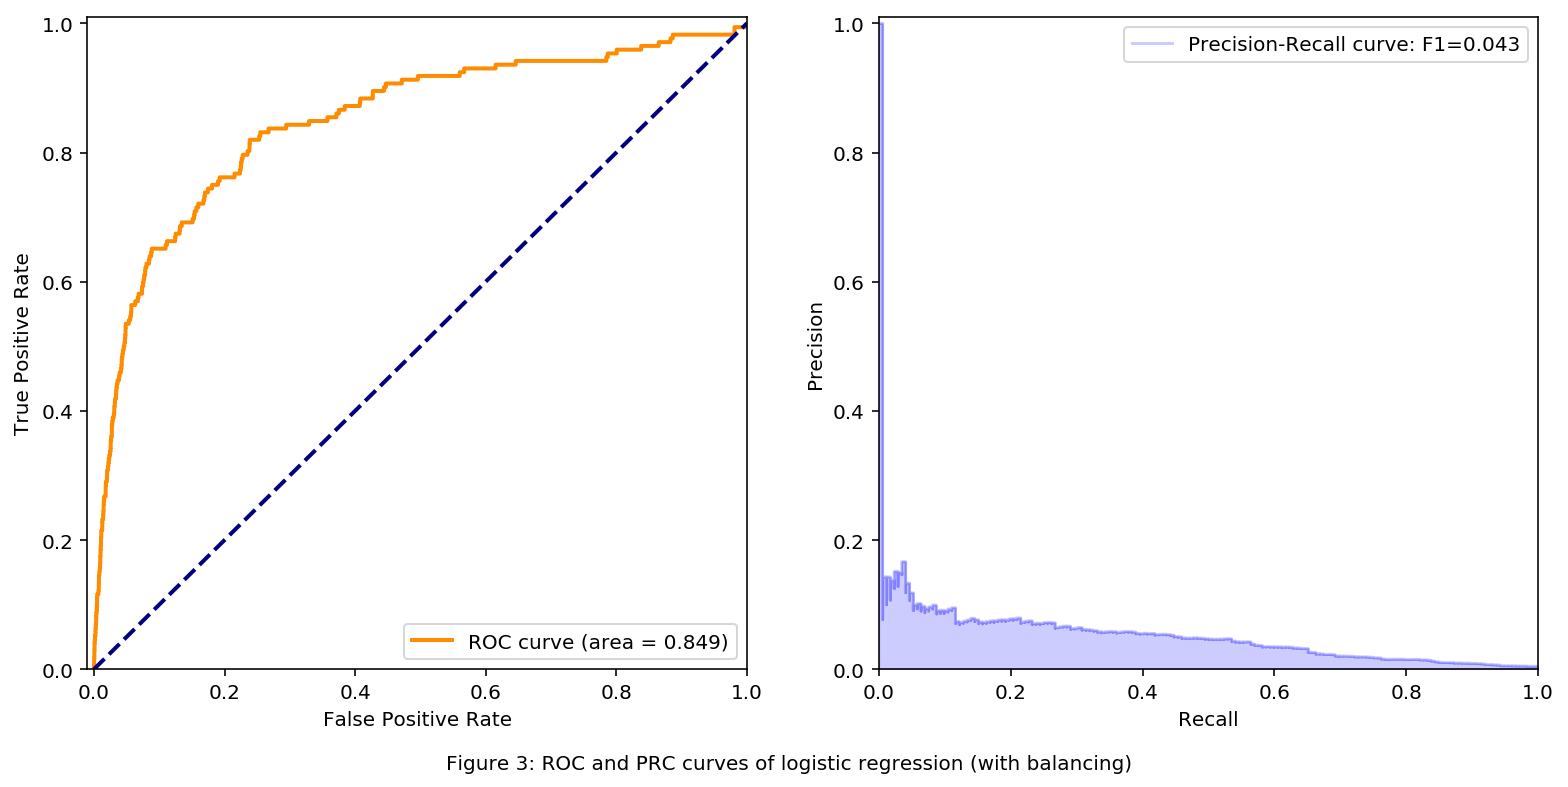

In [8]:
# 10 Fold Cross-Validation with SMOTE on Logistic Classifier
for train_i, val_i in skf.split(X, y):
    train_X, train_y = X[train_i], y[train_i]
    X_res, y_res = SMOTE(random_state = 124).fit_sample(train_X, train_y)
    v_X = X[val_i]
    CV.loc[val_i, 'log_cv_score'] = LogisticRegression(solver = 'liblinear', max_iter=150, C = 0.01).fit(X_res, y_res).predict_proba(v_X).T[1]

# Plotting curves and report on class
print(classification_report(y, CV.log_cv_score.values>0.5, target_names=['Class 0', 'Class 1']))
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.log_cv_score.values)
fig.text(.5, .01, 'Figure 3: ROC and PRC curves of logistic regression (with balancing)', ha='center')
plt.show()

### The AUC is slightly higher than before, but the precision and recall changes a lot: ***Of all records that were labelled 1 by the model, 2% were actually 1 (98% incorrect predictions). Of all records that were truly labelled 1 we predicted 69% correctly.*** 

### Because of the lack of class 1 in validation data, the F1 score and precision-recall curve seems bad, but we do know that the model is fitted rightly and is doing its job predicting. For this reason I will use oversampled balanced training set for every other model. Also, as the harmonic mean of precision and recall, we will use F1 score mainly to decide the performance of models.

### ***Part III*** 

#### ***Model: Decision Tree Classifier***

***(a) Why to use Decision Tree?***

##### Well first of all, we used decision tree to generate the influence of different features. Given that we have already imported the package, why not use it? It is not a black box model and can be applied to unbalanced data (by adding class_weight = 'balanced' in classifier).

***(b) I will validate the AUC and F1 score of the model performance on a 10-fold CV. I will also use SMOTE to balance the data in every validation process.***

              precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96     38037
     Class 1       0.03      0.56      0.06       172

   micro avg       0.92      0.92      0.92     38209
   macro avg       0.51      0.74      0.51     38209
weighted avg       0.99      0.92      0.95     38209



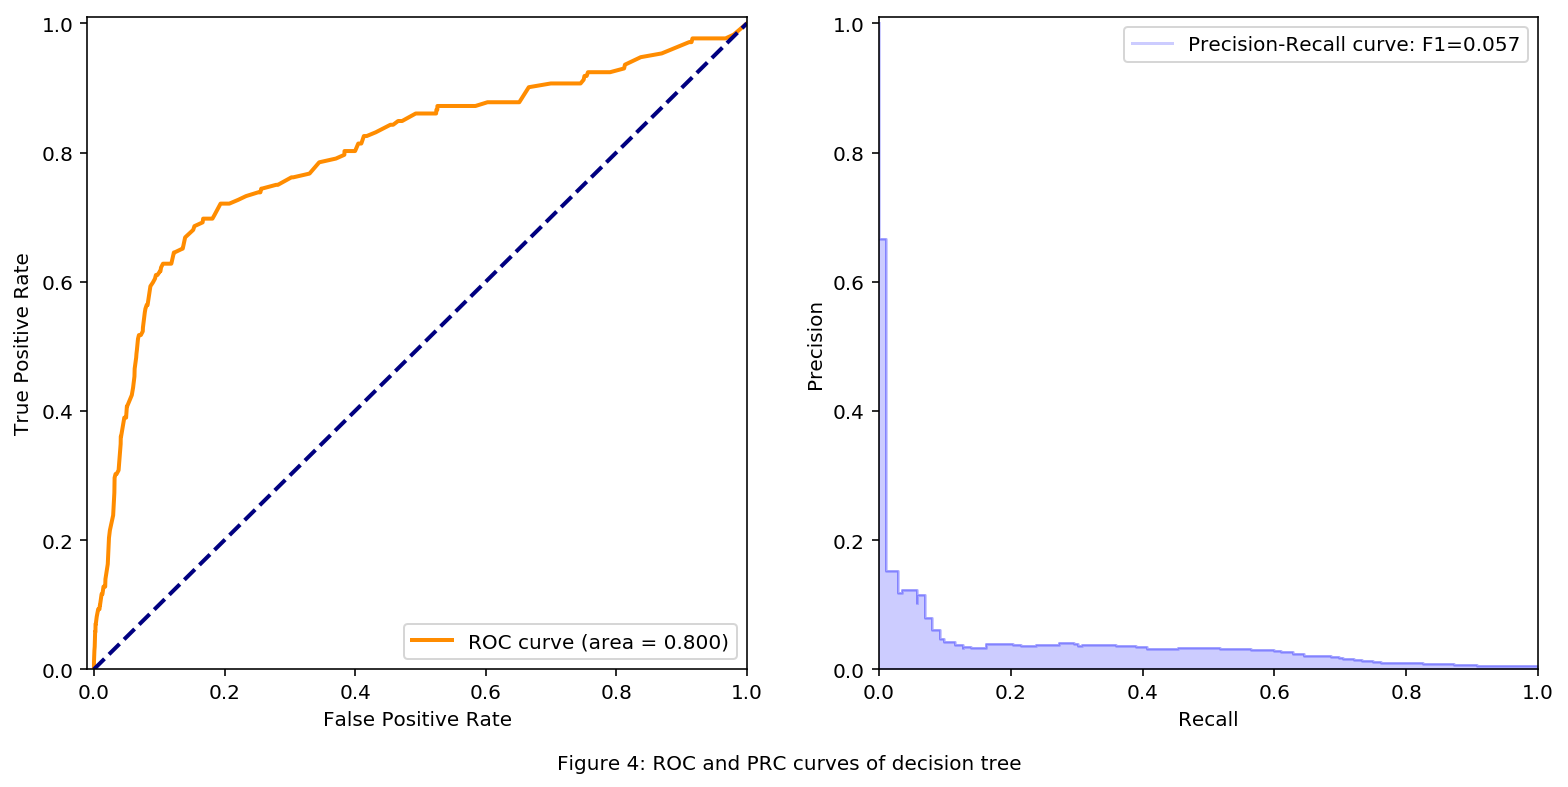

In [9]:
# 10 Fold Cross-Validation with SMOTE on Decision Tree Classifier
for train_i, val_i in skf.split(X, y):
    train_X, train_y = X[train_i], y[train_i]
    X_res, y_res = SMOTE(random_state = 124).fit_sample(train_X, train_y)
    v_X = X[val_i]
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 'auto')
    CV.loc[val_i, 'dt_cv_score'] = dt.fit(X_res, y_res).predict_proba(v_X).T[1]
   
# Plotting curves and report on class
print(classification_report(y, CV.dt_cv_score.values>0.5, target_names=['Class 0', 'Class 1']))
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.dt_cv_score.values)
fig.text(.5, .01, 'Figure 4: ROC and PRC curves of decision tree', ha='center')
plt.show()


## ***Part IV*** 

### ***Model: Random Forest Classifier***

***(a) Why to use Random Forest?***

##### Because it is accurate and powerful, works on linear and non-linear. Despite the fact that it is un-interpretable, it could bring one of the most accurate predictions for this quesion.

***(b) I will validate the AUC and F1 score of the model performance on a 10-fold CV. I will also use SMOTE to balance the data in every validation process.***

              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98     38037
     Class 1       0.04      0.39      0.07       172

   micro avg       0.95      0.95      0.95     38209
   macro avg       0.52      0.67      0.52     38209
weighted avg       0.99      0.95      0.97     38209



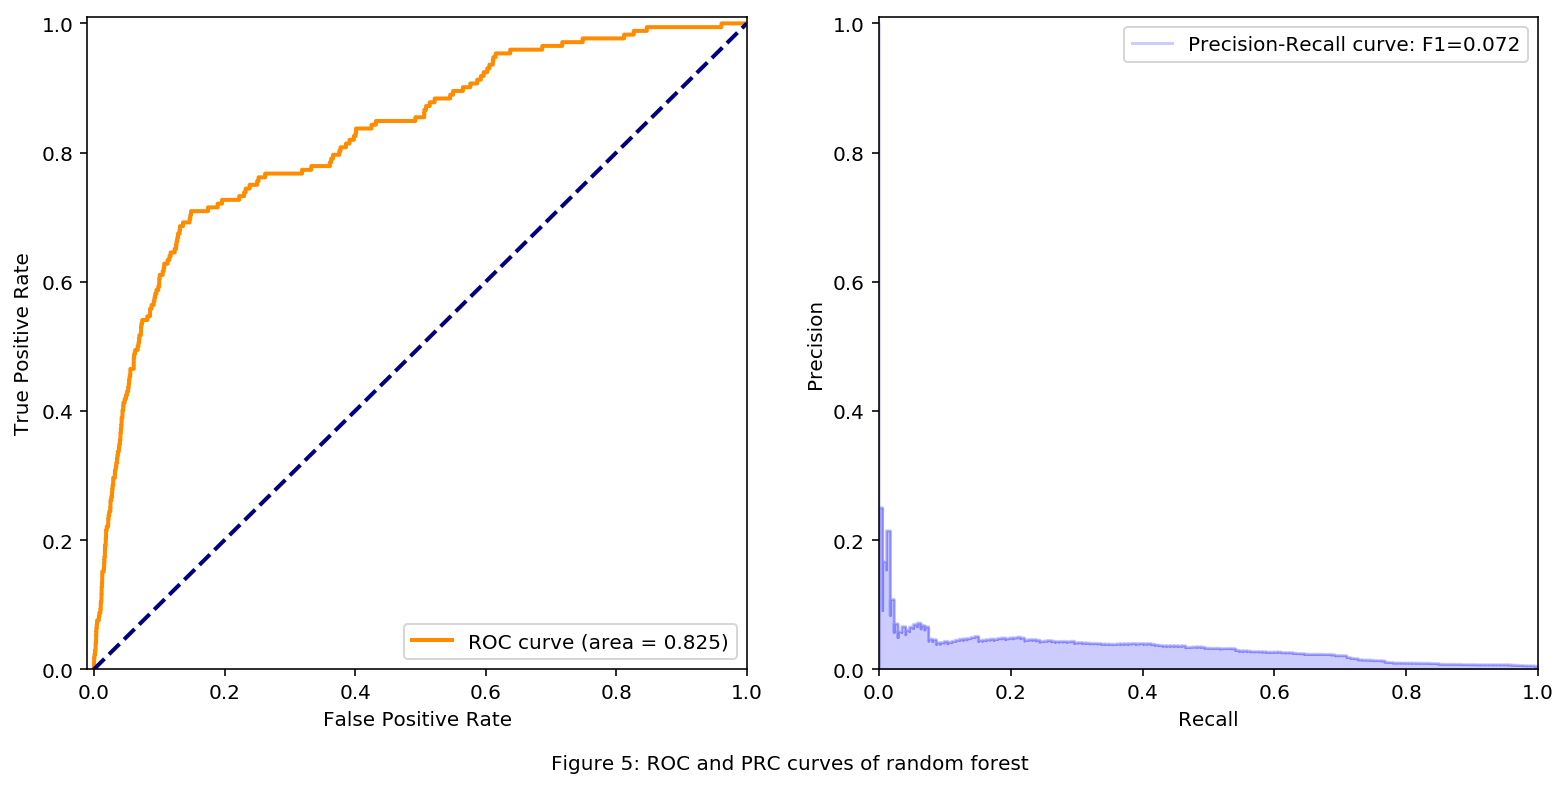

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 10 Fold Cross-Validation with SMOTE on Random Forest Classifier
for train_i, val_i in skf.split(X, y):
    train_X, train_y = X[train_i], y[train_i]
    X_res, y_res = SMOTE(random_state = 124).fit_sample(train_X, train_y)
    v_X = X[val_i]
    rf = RandomForestClassifier(n_estimators=100, max_depth=8)
    CV.loc[val_i, 'rf_cv_score'] = rf.fit(X_res, y_res).predict_proba(v_X).T[1]

# Plotting curves and report on class
print(classification_report(y, CV.rf_cv_score.values>0.5, target_names=['Class 0', 'Class 1']))
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.rf_cv_score.values)
fig.text(.5, .01, 'Figure 5: ROC and PRC curves of random forest', ha='center')
plt.show()

## ***Part V*** 

### ***Model: Gradient Boosting***

***(a) Why to use gradient boosting with random search optimizer on hyperparameter?***

##### Not being a black box model, Gradient Boosting is the #1 used classifier on Kaggle Competitions in since 2017. It is fast, and at the same time, accurate. Moreover, it works well with unbalanced data.

##### Random search also works well when choosing hyper parameter:

$P$(having the top 5% optimized hyperparameter in 100 iterations)$ = 1-(1-0.05)^{100} = 0.994$

***(b) I will validate the AUC and F1 score of the model performance on a 5-fold CV. I will also use SMOTE to balance the data in every validation process.***

In [11]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from imblearn.pipeline import make_pipeline

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=124)

# Given a hyperparameter distribution
gbm_param ={'num_leaves': stats.randint(40, 70), 
            'min_child_samples': stats.randint(100, 400), 
            'min_child_weight': [0.1],
            'subsample': stats.uniform(loc=0.4, scale=0.2), 
            'colsample_bytree': [0.49],
            'reg_alpha': stats.uniform(loc = 2, scale = 6),
            'reg_lambda': stats.uniform(loc = 2, scale = 6),
            'learning_rate': [0.02]}

In [12]:
# Initializing Random Search CV and GBM
gbs = RandomizedSearchCV(
    estimator = LGBMClassifier(metric = 'None', n_estimators = 100), 
    param_distributions = gbm_param, 
    n_iter = 60, # iteration of tests in random search for the hyperparameter
    scoring = 'roc_auc', # Use AUC score as scoring method
    cv = 3, # 3-fold cross validation
    n_jobs = 6, # Using 6 threads
    random_state = 124,
    refit = True)

accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst, i = [], [], [], [], [], 1
for train_idx, test_idx in StratifiedKFold(n_splits = 3).split(X_train, y_train):
    t0 = time.time()
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority', random_state = 124), gbs)
    model = pipeline.fit(X_train[train_idx], y_train[train_idx])
    best_est = gbs.best_estimator_
    prediction = best_est.predict(X_train[test_idx])
    accuracy_lst.append(pipeline.score(X_train[test_idx], y_train[test_idx]))
    precision_lst.append(average_precision_score(y_train[test_idx], prediction))
    recall_lst.append(recall_score(y_train[test_idx], prediction))
    f1_lst.append(f1_score(y_train[test_idx], prediction))
    auc_lst.append(roc_auc_score(y_train[test_idx], prediction))
    print('Done {}/3 fold of Cross Validation, estimated time left: {}s'.format(i, (time.time()-t0)*(3-i))); i+=1
print('---' * 20)
print("average accuracy: {}".format(np.mean(accuracy_lst)))
print("average precision: {}".format(np.mean(precision_lst)))
print("average recall: {}".format(np.mean(recall_lst)))
print("average f1: {}".format(np.mean(f1_lst)))
print('---' * 20)

Done 1/3 fold of Cross Validation, estimated time left: 37.445199489593506s
Done 2/3 fold of Cross Validation, estimated time left: 20.742745876312256s
Done 3/3 fold of Cross Validation, estimated time left: 0.0s
------------------------------------------------------------
average accuracy: 0.8291338040536913
average precision: 0.01616853271841909
average recall: 0.250402576489533
average f1: 0.08448395723281928
------------------------------------------------------------


              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99     38037
     Class 1       0.08      0.36      0.13       172

   micro avg       0.98      0.98      0.98     38209
   macro avg       0.54      0.67      0.56     38209
weighted avg       0.99      0.98      0.98     38209



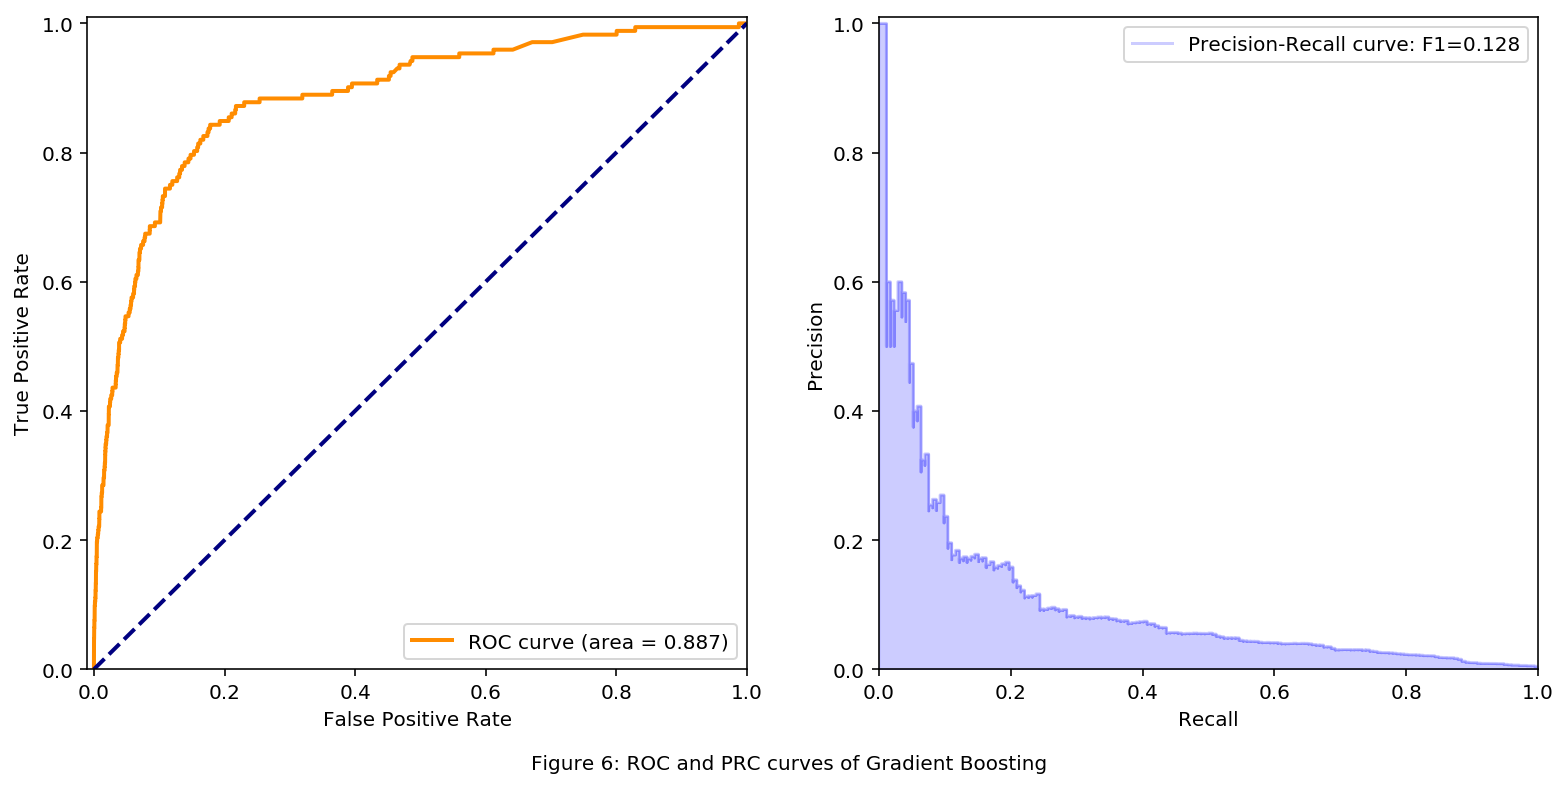

In [13]:
# 10 Fold Cross-Validation with SMOTE on Gradient Boosting
for train_i, val_i in skf.split(X, y):
    train_X, train_y = X[train_i], y[train_i]
    X_res, y_res = SMOTE(random_state = 124).fit_sample(train_X, train_y)
    v_X = X[val_i]
    CV.loc[val_i, 'gbm_cv_score'] = best_est.predict_proba(v_X).T[1]

# Plotting curves and report on class
print(classification_report(y, CV.gbm_cv_score.values>0.5, target_names=['Class 0', 'Class 1']))
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.gbm_cv_score.values)
fig.text(.5, .01, 'Figure 6: ROC and PRC curves of Gradient Boosting', ha='center')
plt.show()

### Conclusion



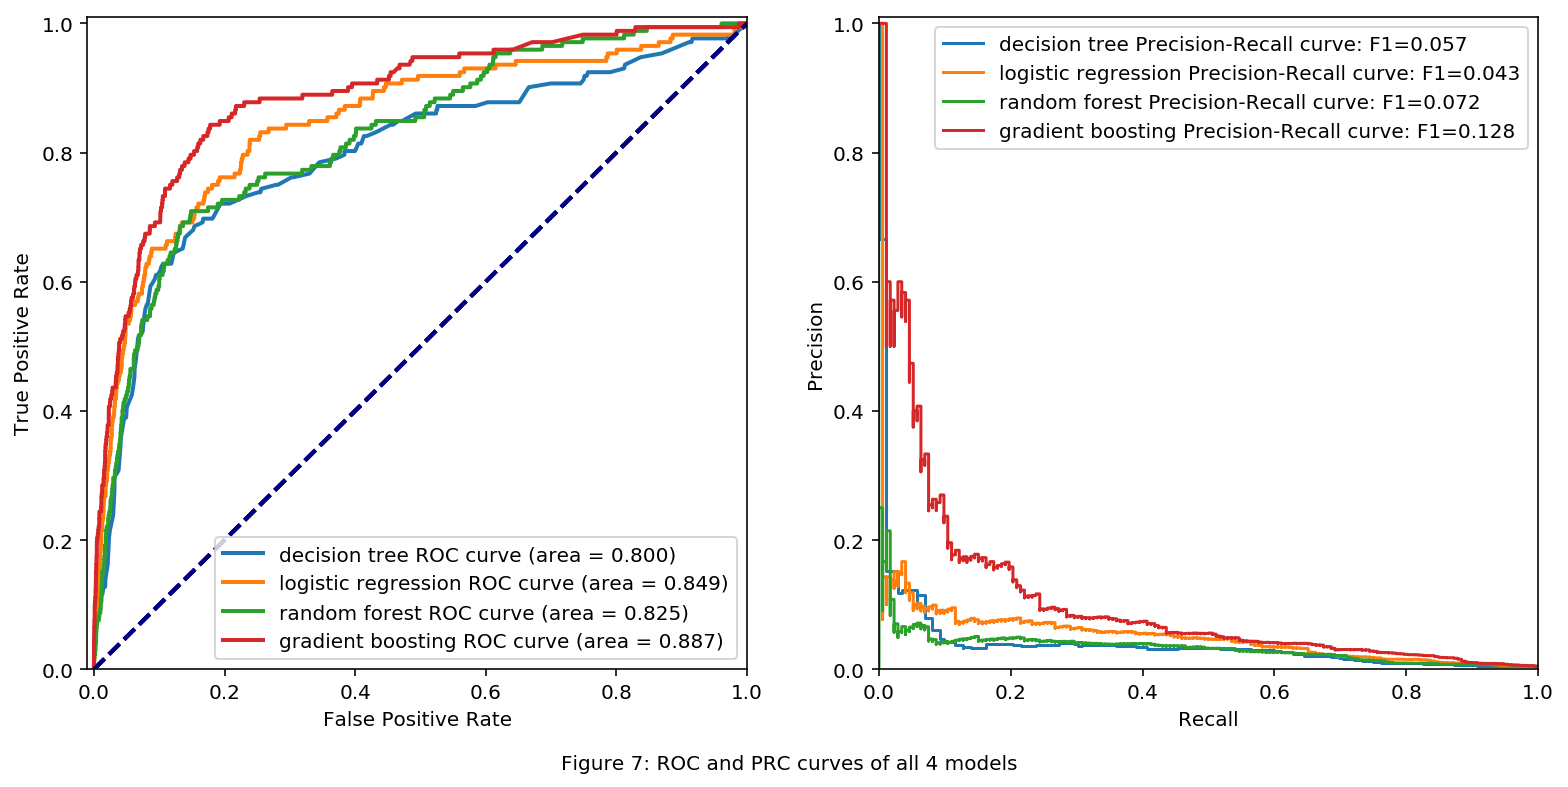

In [14]:
import warnings, matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fig = plt.figure(figsize=(13, 6))
plot_curves(y, CV.dt_cv_score.values, C = False, lab = 'decision tree ')
plot_curves(y, CV.log_cv_score.values, C = False, lab = 'logistic regression ')
plot_curves(y, CV.rf_cv_score.values, C = False, lab = 'random forest ')
plot_curves(y, CV.gbm_cv_score.values, C = False, lab = 'gradient boosting ')
fig.text(.5, .01, 'Figure 7: ROC and PRC curves of all 4 models', ha='center')
plt.show()

A. I used Decision Tree, Logistic Regression, Random Forest and Gradient Boosting to fit the data. ***After doing SMOTE to over-sampling the data and tuning every model, the f1 score is still very low. This might because of the class 0 data size is too little.*** Sorted by their 10-fold cross-validation auc score, the best model is gradient boosting, followed by random forest (very close to the first one), logistic regression and decision tree. Therefore, ***I will use GB model to predict the final result.***

我使用了决策树模型，逻辑回归模型，随机森林模型和梯度递增模型去拟合数据。***尽管对class 0数据进行了重复采样，并且调试了各模型参数，每个模型的F1分数还是很低，这归因于训练数据中class 0数据量过小（仅172）***。根据交叉验证得到的AUC和PRC分数排序，表现最好的模型为梯度递增模型，其次是随机森林与逻辑回归模型，最后是决策树。***因此，我将使用梯度递增模型预测测试数据***。

B. Based on the importance table in Part I, ***the most informative variable is visit_freq.***

根据第一部分中对影响因子的分析，***最具信息的变量是“visit_freq”***。

C. The data is strongly unbalanced, as said in Part I, 99.5% of the training data is labeled 0. The model chosen all have ability to deal with unbalanced data. 

数据非常不平衡，其中99.5%的训练数据的label是0。然而所选模型全部具有处理不平衡数据的能力。

D. Proposed meaning of undefined fields:

***expected_time_buy***: the expected time before making a purchase after register according to previous data (negative means the user is past the expected time);

根据先前数据计算的从用户注册到购买的平均时间，得到的针对每位用户的期望购买时间，负值代表已经过了平均时间还未购买。

***expected_time_visit***: the expected time before visiting website after register according to previous data (negative means the user is past the expected time);

根据先前数据计算的从用户注册到访问网站的平均时间，得到的针对每位用户的期望访问时间，负值代表已经过了平均时间还未访问。

***multiple_buy***: whether the user purchase multiple items at one time;

用户是否在同一次购买了多件商品。

***multiple_visit***: whether the user visit multiple pages from the website at one time;

用户是否在同一次访问了不同页面。

In [15]:
# Final Prediction
label = best_est.predict(X_test)
proba = best_est.predict_proba(X_test).T[1]
prediction = pd.DataFrame({'predicted_label': label,
                           'predicted_proba': proba})
# Export as CSV
prediction.to_csv('prediction.csv', index=False)